In [1]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import re

import sklearn
from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import MinMaxScaler
from sklearn.preprocessing     import PolynomialFeatures
from sklearn.preprocessing     import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model      import LinearRegression
from sklearn.linear_model      import Ridge
from sklearn.linear_model      import Lasso
from sklearn.model_selection   import cross_val_score
from sklearn.model_selection   import KFold
from sklearn.model_selection   import GridSearchCV
from sklearn.pipeline          import make_pipeline
from sklearn.metrics           import mean_squared_error
from sklearn.metrics           import r2_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

## Reading the CSV file

In [2]:
housing_data = pd.read_csv("train.csv", header =0)
housing_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
housing_data.shape

(1460, 81)

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(housing_data.isnull().mean()*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [5]:
#Remove columns with >40% missing values
housing_data = housing_data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)

In [6]:
housing_data.shape

(1460, 76)

In [7]:
housing_data_new = housing_data.dropna(axis = 0, how = 'any')

In [8]:
len(housing_data_new)

1094

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(housing_data.isnull().mean()*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [10]:
#Replacing missing values for LotFrontage with Median values
housing_data.LotFrontage.fillna(housing_data.LotFrontage.median(numeric_only=True), inplace = True)

In [11]:
housing_data.LotFrontage.isnull().mean()*100

0.0

In [12]:
housing_data_new1 = housing_data.dropna(axis = 0, how = 'any')
len(housing_data_new1)

1338

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(housing_data_new1.isnull().mean()*100)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [14]:
# Create new variables
housing_data_new1['Plot_Area'] = housing_data_new1['TotalBsmtSF'] + housing_data_new1['GrLivArea'] + housing_data_new1['GarageArea']

In [15]:
housing_data_new1.shape

(1338, 77)

In [16]:
# Remove more unwanted / redundant variables from the dataset
housing_data_new1.pop('Id')
housing_data_new1.pop('MSSubClass')
housing_data_new1.pop('BsmtFinSF1')
housing_data_new1.pop('BsmtFinSF2')
housing_data_new1.pop('1stFlrSF')
housing_data_new1.pop('2ndFlrSF')
housing_data_new1.pop('GrLivArea')
housing_data_new1.pop('GarageArea')

0       548
1       460
2       608
3       642
4       836
       ... 
1455    460
1456    500
1457    252
1458    240
1459    276
Name: GarageArea, Length: 1338, dtype: int64

In [17]:
housing_data_new1.shape

(1338, 69)

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(housing_data_new1.dtypes)

MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinType2      object
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
LowQualFinSF       int64
BsmtFullBath       int64


## Check category variable wise distribution to drop more variables (not able to seggregate Avg Sales by different categories)

In [19]:
pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'MSZoning', aggfunc=['mean','count',], sort=False)

,mean,count
,SalePrice,SalePrice
MSZoning,,
RL,196479.941839,1066
RM,131409.785340,191
C (all),78172.500000,8
FV,214888.129032,62
RH,126539.454545,11


In [20]:
housing_data_new1.shape

(1338, 69)

In [21]:
# Creating dummy variables for the variable 'MSZoning'
MSZoning_dummy = pd.get_dummies(housing_data_new1['MSZoning'], prefix='MSZoning')
# Dropping MSZoning_RH
MSZoning_dummy1 = MSZoning_dummy.drop(['MSZoning_RH'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,MSZoning_dummy1], axis=1)
housing_data_new1.shape

(1338, 73)

In [22]:
pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'Street', aggfunc=['mean','count',], margins = 1, sort=False)

,mean,count
,SalePrice,SalePrice
Street,,
Pave,186965.207802,1333
Grvl,132528.600000,5
All,186761.782511,1338


In [23]:
#Drop Column 'Street'
housing_data_new1.pop('Street')
housing_data_new1.shape

(1338, 72)

In [24]:
pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'LotShape', aggfunc=['mean','count',], margins = 1, sort=False)

,mean,count
,SalePrice,SalePrice
LotShape,,
Reg,170407.117008,829
IR1,210882.858388,459
IR2,241604.200000,40
IR3,216036.500000,10
All,186761.782511,1338


In [25]:
# Creating dummy variables for the variable 'LotShape'
LotShape_dummy = pd.get_dummies(housing_data_new1['LotShape'], prefix='LotShape')
# Dropping MSZoning_RH
LotShape_dummy1 = LotShape_dummy.drop(['LotShape_IR3'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,LotShape_dummy1], axis=1)
housing_data_new1.shape

(1338, 75)

In [26]:
pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'LandContour', aggfunc=['mean','count',], margins = 1)

,mean,count
,SalePrice,SalePrice
LandContour,,
Bnk,148604.519231,52
HLS,236879.104167,48
Low,218987.500000,32
Lvl,185557.241294,1206
All,186761.782511,1338


In [27]:
# Creating dummy variables for the variable 'LandContour'
LandContour_dummy = pd.get_dummies(housing_data_new1['LandContour'], prefix='LandContour')
# Dropping MSZoning_RH
LandContour_dummy1 = LandContour_dummy.drop(['LandContour_Bnk'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,LandContour_dummy1], axis=1)
housing_data_new1.shape

(1338, 78)

In [28]:
pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'Utilities', aggfunc=['mean','count',], margins = 1)

,mean,count
,SalePrice,SalePrice
Utilities,,
AllPub,186798.627524,1337
NoSeWa,137500.000000,1
All,186761.782511,1338


In [29]:
#Drop Column 'Street'
housing_data_new1.pop('Utilities')
housing_data_new1.shape

(1338, 77)

In [30]:
pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'LotConfig', aggfunc=['mean','count',], margins = 1)

,mean,count
,SalePrice,SalePrice
LotConfig,,
Corner,187152.299180,244
CulDSac,227673.444444,90
FR2,184398.255814,43
FR3,208475.000000,4
Inside,182830.166144,957
All,186761.782511,1338


In [31]:
# Creating dummy variables for the variable 'LotConfig'
LotConfig_dummy = pd.get_dummies(housing_data_new1['LotConfig'], prefix='LotConfig')
# Dropping LotConfig_FR3
LotConfig_dummy1 = LotConfig_dummy.drop(['LotConfig_FR3'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,LotConfig_dummy1], axis=1)
housing_data_new1.shape

(1338, 81)

In [32]:
pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'LandSlope', aggfunc=['mean','count',], margins = 1)

,mean,count
,SalePrice,SalePrice
LandSlope,,
Gtl,185611.396047,1265
Mod,204801.950820,61
Sev,216327.500000,12
All,186761.782511,1338


In [33]:
#Drop Column 'LandSlope'
housing_data_new1.pop('LandSlope')
housing_data_new1.shape

(1338, 80)

In [34]:
Neighborhood_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'Neighborhood', aggfunc=['mean','count',])
Neighborhood_data.columns = ["_".join((j,k)) for j,k in Neighborhood_data.columns]
Neighborhood_data.reset_index()
#Neighborhood_data.dtypes
Neighborhood_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
Neighborhood,,
NoRidge,335295.317073,41
NridgHt,314717.840000,75
StoneBr,310499.000000,25
Timber,244267.648649,37
Veenker,238772.727273,11
Somerst,226443.566265,83
ClearCr,216034.615385,26
Crawfor,210824.740000,50
CollgCr,198751.821918,146


In [35]:
# Creating dummy variables for the variable 'Neighborhood'
Neighborhood_dummy = pd.get_dummies(housing_data_new1['Neighborhood'], prefix='Neighborhood')
# Dropping Neighborhood_MeadowV
Neighborhood_dummy1 = Neighborhood_dummy.drop(['Neighborhood_MeadowV'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,Neighborhood_dummy1], axis=1)
housing_data_new1.shape

(1338, 104)

In [36]:
Condition1_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'Condition1', aggfunc=['mean','count',])
Condition1_data.columns = ["_".join((j,k)) for j,k in Condition1_data.columns]
Condition1_data.reset_index()
Condition1_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
Condition1,,
PosA,225875.000000,8
PosN,215184.210526,19
RRNn,212400.000000,5
RRNe,190750.000000,2
Norm,190095.717728,1162
RRAn,184396.615385,26
Feedr,150990.936508,63
RRAe,141040.000000,10
Artery,138137.209302,43


In [37]:
#Drop Column 'Condition1' & 'Condition2'
housing_data_new1.pop('Condition1')
housing_data_new1.pop('Condition2')
housing_data_new1.shape

(1338, 102)

In [38]:
BldgType_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'BldgType', aggfunc=['mean','count',])
BldgType_data.columns = ["_".join((j,k)) for j,k in BldgType_data.columns]
BldgType_data.reset_index()
BldgType_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
BldgType,,
1Fam,190753.153779,1138
TwnhsE,182749.687500,112
Duplex,144723.607143,28
Twnhs,142057.894737,38
2fmCon,131443.181818,22


In [39]:
# Creating dummy variables for the variable 'BldgType'
BldgType_dummy = pd.get_dummies(housing_data_new1['BldgType'], prefix='BldgType')
# Dropping BldgType_2fmCon
BldgType_dummy1 = BldgType_dummy.drop(['BldgType_2fmCon'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,BldgType_dummy1], axis=1)
housing_data_new1.shape

(1338, 106)

In [40]:
HouseStyle_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'HouseStyle', aggfunc=['mean','count',])
HouseStyle_data.columns = ["_".join((j,k)) for j,k in HouseStyle_data.columns]
HouseStyle_data.reset_index()
HouseStyle_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
HouseStyle,,
2.5Fin,242666.666667,6
2Story,213119.676056,426
1Story,182606.789954,657
SLvl,166690.937500,64
2.5Unf,160290.000000,10
1.5Fin,148774.970149,134
SFoyer,140675.200000,30
1.5Unf,112945.454545,11


In [41]:
#Drop Column 'HouseStyle'
housing_data_new1.pop('HouseStyle')
housing_data_new1.shape

(1338, 105)

In [42]:
RoofStyle_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'RoofStyle', aggfunc=['mean','count',])
RoofStyle_data.columns = ["_".join((j,k)) for j,k in RoofStyle_data.columns]
RoofStyle_data.reset_index()
RoofStyle_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
RoofStyle,,
Shed,225000.000000,2
Hip,224140.731618,272
Flat,211042.727273,11
Mansard,187496.500000,6
Gable,176921.443587,1037
Gambrel,155700.000000,10


In [43]:
# Creating dummy variables for the variable 'RoofStyle'
RoofStyle_dummy = pd.get_dummies(housing_data_new1['RoofStyle'], prefix='RoofStyle')
# Dropping RoofStyle_Gambrel
RoofStyle_dummy1 = RoofStyle_dummy.drop(['RoofStyle_Gambrel'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,RoofStyle_dummy1], axis=1)
housing_data_new1.shape

(1338, 110)

In [44]:
RoofMatl_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'RoofMatl', aggfunc=['mean','count',])
RoofMatl_data.columns = ["_".join((j,k)) for j,k in RoofMatl_data.columns]
RoofMatl_data.reset_index()
RoofMatl_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
RoofMatl,,
WdShngl,390250.000000,6
Membran,241500.000000,1
WdShake,241400.000000,5
Tar&Grv,203330.000000,9
CompShg,185532.949011,1314
Metal,180000.000000,1
ClyTile,160000.000000,1
Roll,137000.000000,1


In [45]:
#Drop Column 'RoofMatl'
housing_data_new1.pop('RoofMatl')
housing_data_new1.shape

(1338, 109)

In [46]:
Exterior1st_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'Exterior1st', aggfunc=['mean','count',])
Exterior1st_data.columns = ["_".join((j,k)) for j,k in Exterior1st_data.columns]
Exterior1st_data.reset_index()
Exterior1st_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
Exterior1st,,
ImStucc,262000.000000,1
Stone,258500.000000,2
CemntBd,252090.000000,52
VinylSd,217880.543210,486
BrkFace,205869.318182,44
Plywood,179080.160000,100
Stucco,177559.523810,21
HdBoard,165314.834123,211
WdShing,163105.000000,20


In [47]:
#Drop Column 'Exterior1st' & 'Exterior2nd'
housing_data_new1.pop('Exterior1st')
housing_data_new1.pop('Exterior2nd')
housing_data_new1.shape

(1338, 107)

In [48]:
MasVnrType_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'MasVnrType', aggfunc=['mean','count',])
MasVnrType_data.columns = ["_".join((j,k)) for j,k in MasVnrType_data.columns]
MasVnrType_data.reset_index()
MasVnrType_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
MasVnrType,,
Stone,265583.625000,128
BrkFace,206541.395833,432
None,163134.871560,763
BrkCmn,146318.066667,15


In [49]:
# Creating dummy variables for the variable 'MasVnrType'
MasVnrType_dummy = pd.get_dummies(housing_data_new1['MasVnrType'], prefix='MasVnrType')
# Dropping MasVnrType_BrkCmn
MasVnrType_dummy1 = MasVnrType_dummy.drop(['MasVnrType_BrkCmn'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,MasVnrType_dummy1], axis=1)
housing_data_new1.shape

(1338, 110)

In [50]:
ExterQual_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'ExterQual', aggfunc=['mean','count',])
ExterQual_data.columns = ["_".join((j,k)) for j,k in ExterQual_data.columns]
ExterQual_data.reset_index()
ExterQual_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
ExterQual,,
Ex,365446.470588,51
Gd,232459.704403,477
TA,149087.450809,803
Fa,92713.285714,7


In [51]:
# Define a function to convert categories into numbers

def Qual_Scale(x):
    if x == 'Ex': return 5
    elif x == 'Gd': return 4
    elif x == 'TA': return 3
    elif x == 'Fa': return 2
    elif x == 'Po': return 1
    else: return 0

In [52]:
housing_data_new1['ExterQual_Num'] = housing_data_new1.ExterQual.apply(Qual_Scale)
housing_data_new1.ExterQual_Num.value_counts()

3    803
4    477
5     51
2      7
Name: ExterQual_Num, dtype: int64

In [53]:
housing_data_new1.shape

(1338, 111)

In [54]:
#Drop Column 'ExterQual'
housing_data_new1.pop('ExterQual')
housing_data_new1.shape

(1338, 110)

In [55]:
pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'ExterCond', aggfunc=['mean','count',], margins = 1)

,mean,count
,SalePrice,SalePrice
ExterCond,,
Ex,243000.000000,2
Fa,115343.750000,16
Gd,173124.416058,137
TA,189211.935757,1183
All,186761.782511,1338


In [56]:
#Drop Column 'ExterCond'
housing_data_new1.pop('ExterCond')

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    Gd
1458    TA
1459    TA
Name: ExterCond, Length: 1338, dtype: object

In [57]:
housing_data_new1.shape

(1338, 109)

In [58]:
pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'Foundation', aggfunc=['mean','count',], margins = 1)

,mean,count
,SalePrice,SalePrice
Foundation,,
BrkTil,138340.674419,129
CBlock,153721.105172,580
PConc,227952.132258,620
Stone,165959.166667,6
Wood,185666.666667,3
All,186761.782511,1338


In [59]:
# Creating dummy variables for the variable 'Foundation'
Foundation_dummy = pd.get_dummies(housing_data_new1['Foundation'], prefix='Foundation')
# Dropping Foundation_Wood
Foundation_dummy1 = Foundation_dummy.drop(['Foundation_Wood'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,Foundation_dummy1], axis=1)
housing_data_new1.shape

(1338, 113)

In [60]:
BsmtQual_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'BsmtQual', aggfunc=['mean','count',])
BsmtQual_data.columns = ["_".join((j,k)) for j,k in BsmtQual_data.columns]
BsmtQual_data.reset_index()
BsmtQual_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
BsmtQual,,
Ex,325891.383333,120
Gd,205136.199324,592
TA,144000.585859,594
Fa,118853.781250,32


In [61]:
housing_data_new1['BsmtQual_Num'] = housing_data_new1.BsmtQual.apply(Qual_Scale)
housing_data_new1.BsmtQual_Num.value_counts()

3    594
4    592
5    120
2     32
Name: BsmtQual_Num, dtype: int64

In [62]:
#Drop Column 'BsmtQual'
housing_data_new1.pop('BsmtQual')
housing_data_new1.shape

(1338, 113)

In [63]:
BsmtCond_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'BsmtCond', aggfunc=['mean','count',])
BsmtCond_data.columns = ["_".join((j,k)) for j,k in BsmtCond_data.columns]
BsmtCond_data.reset_index()
BsmtCond_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
BsmtCond,,
Gd,211491.838710,62
TA,187534.957154,1237
Fa,124395.500000,38
Po,67000.000000,1


In [64]:
#Drop Column 'BsmtCond'
housing_data_new1.pop('BsmtCond')
housing_data_new1.shape

(1338, 112)

In [65]:
BsmtExposure_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'BsmtExposure', aggfunc=['mean','count',])
BsmtExposure_data.columns = ["_".join((j,k)) for j,k in BsmtExposure_data.columns]
BsmtExposure_data.reset_index()
BsmtExposure_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
BsmtExposure,,
Gd,262393.181102,127
Av,210625.333333,213
Mn,194941.630631,111
No,169178.820744,887


In [66]:
# Creating dummy variables for the variable 'BsmtExposure'
BsmtExposure_dummy = pd.get_dummies(housing_data_new1['BsmtExposure'], prefix='BsmtExposure')
# Dropping BsmtExposure_No
BsmtExposure_dummy1 = BsmtExposure_dummy.drop(['BsmtExposure_No'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,BsmtExposure_dummy1], axis=1)
housing_data_new1.shape

(1338, 115)

In [67]:
BsmtFinType1_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'BsmtFinType1', aggfunc=['mean','count',])
BsmtFinType1_data.columns = ["_".join((j,k)) for j,k in BsmtFinType1_data.columns]
BsmtFinType1_data.reset_index()
BsmtFinType1_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
BsmtFinType1,,
GLQ,237840.883085,402
Unf,176710.454082,392
ALQ,163946.052632,209
LwQ,154639.130435,69
BLQ,152528.801418,141
Rec,148506.768000,125


In [68]:
# Creating dummy variables for the variable 'BsmtFinType1'
BsmtFinType1_dummy = pd.get_dummies(housing_data_new1['BsmtFinType1'], prefix='BsmtFinType1')
# Dropping BsmtExposure_Rec
BsmtFinType1_dummy1 = BsmtFinType1_dummy.drop(['BsmtFinType1_Rec'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,BsmtFinType1_dummy1], axis=1)
housing_data_new1.shape

(1338, 120)

In [69]:
Heating_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'Heating', aggfunc=['mean','count',])
Heating_data.columns = ["_".join((j,k)) for j,k in Heating_data.columns]
Heating_data.reset_index()
Heating_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
Heating,,
GasA,187145.588771,1318
GasW,175148.687500,16
OthW,129500.000000,1
Grav,99166.666667,3


In [70]:
#Drop Column 'Heating'
housing_data_new1.pop('Heating')
housing_data_new1.shape

(1338, 119)

In [71]:
HeatingQC_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'HeatingQC', aggfunc=['mean','count',])
HeatingQC_data.columns = ["_".join((j,k)) for j,k in HeatingQC_data.columns]
HeatingQC_data.reset_index()
HeatingQC_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
HeatingQC,,
Ex,218604.036932,704
Gd,162766.764977,217
TA,146033.236842,380
Fa,141389.027778,36
Po,87000.000000,1


In [72]:
housing_data_new1['HeatingQC_Num'] = housing_data_new1.HeatingQC.apply(Qual_Scale)
housing_data_new1.HeatingQC_Num.value_counts()

5    704
3    380
4    217
2     36
1      1
Name: HeatingQC_Num, dtype: int64

In [73]:
#Drop Column 'HeatingQC'
housing_data_new1.pop('HeatingQC')
housing_data_new1.shape

(1338, 119)

In [74]:
CentralAir_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'CentralAir', aggfunc=['mean','count',])
CentralAir_data.columns = ["_".join((j,k)) for j,k in CentralAir_data.columns]
CentralAir_data.reset_index()
CentralAir_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
CentralAir,,
Y,190205.816758,1277
N,114662.901639,61


In [75]:
# Creating dummy variables for the variable 'CentralAir'
CentralAir_dummy = pd.get_dummies(housing_data_new1['CentralAir'], prefix='CentralAir')
# Dropping CentralAir_N
CentralAir_dummy1 = CentralAir_dummy.drop(['CentralAir_N'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,CentralAir_dummy1], axis=1)
housing_data_new1.shape

(1338, 120)

In [76]:
Electrical_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'Electrical', aggfunc=['mean','count',])
Electrical_data.columns = ["_".join((j,k)) for j,k in Electrical_data.columns]
Electrical_data.reset_index()
Electrical_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
Electrical,,
SBrkr,191523.647343,1242
FuseA,127920.500000,76
FuseF,118584.529412,17
FuseP,105000.000000,2
Mix,67000.000000,1


In [77]:
# Creating dummy variables for the variable 'Electrical'
Electrical_dummy = pd.get_dummies(housing_data_new1['Electrical'], prefix='Electrical')
# Dropping Electrical_Mix
Electrical_dummy1 = Electrical_dummy.drop(['Electrical_Mix'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,Electrical_dummy1], axis=1)
housing_data_new1.shape

(1338, 124)

In [78]:
KitchenQual_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'KitchenQual', aggfunc=['mean','count',])
KitchenQual_data.columns = ["_".join((j,k)) for j,k in KitchenQual_data.columns]
KitchenQual_data.reset_index()
KitchenQual_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
KitchenQual,,
Ex,330906.876289,97
Gd,213636.161972,568
TA,144225.561538,650
Fa,117275.782609,23


In [79]:
housing_data_new1['KitchenQual_Num'] = housing_data_new1.KitchenQual.apply(Qual_Scale)
housing_data_new1.KitchenQual_Num.value_counts()

3    650
4    568
5     97
2     23
Name: KitchenQual_Num, dtype: int64

In [80]:
#Drop Column 'KitchenQual'
housing_data_new1.pop('KitchenQual')
housing_data_new1.shape

(1338, 124)

In [81]:
Functional_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'Functional', aggfunc=['mean','count',])
Functional_data.columns = ["_".join((j,k)) for j,k in Functional_data.columns]
Functional_data.reset_index()
Functional_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
Functional,,
Mod,198990.909091,11
Typ,188896.263955,1254
Maj1,163315.000000,10
Min1,151523.214286,28
Min2,148021.666667,30
Sev,129000.000000,1
Maj2,94250.000000,4


In [82]:
#Drop Column 'Functional'
housing_data_new1.pop('Functional')
housing_data_new1.shape

(1338, 123)

In [83]:
GarageQual_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'GarageQual', aggfunc=['mean','count',])
GarageQual_data.columns = ["_".join((j,k)) for j,k in GarageQual_data.columns]
GarageQual_data.reset_index()
GarageQual_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
GarageQual,,
Ex,241000.000000,3
Gd,215860.714286,14
TA,188905.664567,1270
Fa,123573.354167,48
Po,100166.666667,3


In [84]:
housing_data_new1['GarageQual_Num'] = housing_data_new1.GarageQual.apply(Qual_Scale)
housing_data_new1.GarageQual_Num.value_counts()

3    1270
2      48
4      14
5       3
1       3
Name: GarageQual_Num, dtype: int64

In [85]:
#Drop Column 'GarageQual'
housing_data_new1.pop('GarageQual')
housing_data_new1.shape

(1338, 123)

In [86]:
GarageCond_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'GarageCond', aggfunc=['mean','count',])
GarageCond_data.columns = ["_".join((j,k)) for j,k in GarageCond_data.columns]
GarageCond_data.reset_index()
GarageCond_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
GarageCond,,
TA,189123.546232,1287
Gd,179930.000000,9
Ex,124000.000000,2
Fa,116920.939394,33
Po,108500.000000,7


In [87]:
housing_data_new1['GarageCond_Num'] = housing_data_new1.GarageCond.apply(Qual_Scale)
housing_data_new1.GarageCond_Num.value_counts()

3    1287
2      33
4       9
1       7
5       2
Name: GarageCond_Num, dtype: int64

In [88]:
#Drop Column 'GarageCond'
housing_data_new1.pop('GarageCond')
housing_data_new1.shape

(1338, 123)

In [89]:
PavedDrive_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'PavedDrive', aggfunc=['mean','count',])
PavedDrive_data.columns = ["_".join((j,k)) for j,k in PavedDrive_data.columns]
PavedDrive_data.reset_index()
PavedDrive_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
PavedDrive,,
Y,190400.100239,1257
P,133848.148148,27
N,128526.648148,54


In [90]:
# Creating dummy variables for the variable 'PavedDrive'
PavedDrive_dummy = pd.get_dummies(housing_data_new1['PavedDrive'], prefix='PavedDrive')
# Dropping BsmtExposure_N
PavedDrive_dummy1 = PavedDrive_dummy.drop(['PavedDrive_N'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,PavedDrive_dummy1], axis=1)
housing_data_new1.shape

(1338, 125)

In [91]:
SaleType_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'SaleType', aggfunc=['mean','count',])
SaleType_data.columns = ["_".join((j,k)) for j,k in SaleType_data.columns]
SaleType_data.reset_index()
SaleType_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
SaleType,,
New,277234.538462,117
Con,269600.000000,2
ConLI,221737.500000,4
CWD,210600.000000,4
WD,179151.335060,1158
ConLw,164625.000000,4
ConLD,147604.666667,6
COD,144401.190476,42
Oth,116050.000000,1


In [92]:
# Creating dummy variables for the variable 'SaleType'
SaleType_dummy = pd.get_dummies(housing_data_new1['SaleType'], prefix='SaleType')
# Dropping SaleType_Oth
SaleType_dummy1 = SaleType_dummy.drop(['SaleType_Oth'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,SaleType_dummy1], axis=1)
housing_data_new1.shape

(1338, 133)

In [93]:
SaleCondition_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'SaleCondition', aggfunc=['mean','count',])
SaleCondition_data.columns = ["_".join((j,k)) for j,k in SaleCondition_data.columns]
SaleCondition_data.reset_index()
SaleCondition_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
SaleCondition,,
Partial,274413.075000,120
Normal,180521.265399,1104
Alloca,178304.285714,7
Abnorml,154605.686047,86
Family,149600.000000,20
AdjLand,126000.000000,1


In [94]:
# Creating dummy variables for the variable 'SaleCondition'
SaleCondition_dummy = pd.get_dummies(housing_data_new1['SaleCondition'], prefix='SaleCondition')
# Dropping SaleCondition_AdjLand
SaleCondition_dummy1 = SaleCondition_dummy.drop(['SaleCondition_AdjLand'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,SaleCondition_dummy1], axis=1)
housing_data_new1.shape

(1338, 138)

In [95]:
BldgType_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'GarageType', aggfunc=['mean','count',])
BldgType_data.columns = ["_".join((j,k)) for j,k in BldgType_data.columns]
BldgType_data.reset_index()
BldgType_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
GarageType,,
BuiltIn,256890.035294,85
Attchd,203331.942488,852
Basment,160570.684211,19
2Types,151283.333333,6
Detchd,135654.186992,369
CarPort,113979.857143,7


In [96]:
# Creating dummy variables for the variable 'GarageType'
GarageType_dummy = pd.get_dummies(housing_data_new1['GarageType'], prefix='GarageType')
# Dropping GarageType_CarPort
GarageType_dummy1 = GarageType_dummy.drop(['GarageType_CarPort'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,GarageType_dummy1], axis=1)
housing_data_new1.shape

(1338, 143)

In [97]:
BldgType_data = pd.pivot_table(data = housing_data_new1, values = 'SalePrice', index = 'GarageFinish', aggfunc=['mean','count',])
BldgType_data.columns = ["_".join((j,k)) for j,k in BldgType_data.columns]
BldgType_data.reset_index()
BldgType_data.sort_values(by='mean_SalePrice', ascending=False)

,mean_SalePrice,count_SalePrice
GarageFinish,,
Fin,240652.797101,345
RFn,202283.508475,413
Unf,143653.381034,580


In [98]:
# Creating dummy variables for the variable 'GarageFinish'
GarageFinish_dummy = pd.get_dummies(housing_data_new1['GarageFinish'], prefix='GarageFinish')
# Dropping GarageFinish_Unf
GarageFinish_dummy1 = GarageFinish_dummy.drop(['GarageFinish_Unf'], 1)
#Adding the results to the master dataframe
housing_data_new1 = pd.concat([housing_data_new1,GarageFinish_dummy1], axis=1)
housing_data_new1.shape

(1338, 145)

In [99]:
#Check final set of variables after dummy creation
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(housing_data_new1.dtypes)

MSZoning                  object
LotFrontage              float64
LotArea                    int64
LotShape                  object
LandContour               object
LotConfig                 object
Neighborhood              object
BldgType                  object
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
RoofStyle                 object
MasVnrType                object
MasVnrArea               float64
Foundation                object
BsmtExposure              object
BsmtFinType1              object
BsmtFinType2              object
BsmtUnfSF                  int64
TotalBsmtSF                int64
CentralAir                object
Electrical                object
LowQualFinSF               int64
BsmtFullBath               int64
BsmtHalfBath               int64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
TotRmsAbvG

In [100]:
#Drop few redundant variables
housing_data_new1.pop('MSZoning')
housing_data_new1.pop('LotShape')
housing_data_new1.pop('LandContour')
housing_data_new1.pop('LotConfig')
housing_data_new1.pop('Neighborhood')
housing_data_new1.pop('BldgType')
housing_data_new1.pop('RoofStyle')
housing_data_new1.pop('MasVnrType')
housing_data_new1.pop('Foundation')
housing_data_new1.pop('BsmtExposure')
housing_data_new1.pop('BsmtFinType1')
housing_data_new1.pop('BsmtFinType2')
housing_data_new1.pop('CentralAir')
housing_data_new1.pop('Electrical')
housing_data_new1.pop('GarageType')
housing_data_new1.pop('GarageYrBlt')
housing_data_new1.pop('GarageFinish')
housing_data_new1.pop('PavedDrive')
housing_data_new1.pop('SaleType')
housing_data_new1.pop('SaleCondition')
housing_data_new1.pop('YearRemodAdd')
housing_data_new1.shape

(1338, 124)

In [101]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(housing_data_new1.dtypes)

LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
MasVnrArea               float64
BsmtUnfSF                  int64
TotalBsmtSF                int64
LowQualFinSF               int64
BsmtFullBath               int64
BsmtHalfBath               int64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
TotRmsAbvGrd               int64
Fireplaces                 int64
GarageCars                 int64
WoodDeckSF                 int64
OpenPorchSF                int64
EnclosedPorch              int64
3SsnPorch                  int64
ScreenPorch                int64
PoolArea                   int64
MiscVal                    int64
MoSold                     int64
YrSold                     int64
SalePrice                  int64
Plot_Area                  int64
MSZoning_C (all)           uint8
MSZoning_F

In [102]:
housing_data_new1.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,BsmtFullBath,...,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn
0,65.0,8450,7,5,2003,196.0,150,856,0,1,...,0,1,0,0,1,0,0,0,0,1
1,80.0,9600,6,8,1976,0.0,284,1262,0,0,...,0,1,0,0,1,0,0,0,0,1
2,68.0,11250,7,5,2001,162.0,434,920,0,1,...,0,1,0,0,1,0,0,0,0,1
3,60.0,9550,7,5,1915,0.0,540,756,0,1,...,0,0,0,0,0,0,0,1,0,0
4,84.0,14260,8,5,2000,350.0,490,1145,0,1,...,0,1,0,0,1,0,0,0,0,1


## Split data into training and Test

In [103]:
# Data split into training and test datasets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
housing_data_train, housing_data_test = train_test_split(housing_data_new1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [104]:
housing_data_train.shape

(936, 124)

In [105]:
housing_data_test.shape

(402, 124)

## Diving data into Predictor (X) and Response (y) datasets

In [106]:
y_train = housing_data_train.pop('SalePrice')
X_train = housing_data_train

In [107]:
y_train.head()

1059    220000
571     120000
173     163000
732     222500
1282    150500
Name: SalePrice, dtype: int64

In [108]:
y_train.shape

(936,)

In [109]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,BsmtFullBath,...,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn
1059,69.0,11275,6,7,1932,480.0,0,854,0,0,...,0,1,0,0,0,0,0,1,0,0
571,60.0,7332,6,6,1959,207.0,450,864,0,1,...,0,0,0,0,1,0,0,0,0,0
173,80.0,10197,6,5,1961,491.0,700,1362,0,1,...,0,1,0,0,1,0,0,0,0,0
732,75.0,11404,7,5,1998,202.0,901,1153,0,0,...,0,1,0,0,1,0,0,0,1,0
1282,61.0,8800,5,7,1977,0.0,364,1040,0,0,...,0,1,0,0,0,0,0,1,0,0


In [110]:
X_train.shape

(936, 123)

## Running first model using RFE (Recursive feature elimination) - 50 variables

In [111]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model      import LinearRegression

In [112]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=50)  
rfe = rfe.fit(X_train, y_train)

In [113]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 58),
 ('LotArea', False, 72),
 ('OverallQual', True, 1),
 ('OverallCond', False, 28),
 ('YearBuilt', False, 65),
 ('MasVnrArea', False, 62),
 ('BsmtUnfSF', False, 67),
 ('TotalBsmtSF', False, 71),
 ('LowQualFinSF', False, 63),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 17),
 ('FullBath', False, 2),
 ('HalfBath', False, 12),
 ('BedroomAbvGr', False, 15),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 68),
 ('OpenPorchSF', False, 69),
 ('EnclosedPorch', False, 70),
 ('3SsnPorch', False, 61),
 ('ScreenPorch', False, 66),
 ('PoolArea', False, 57),
 ('MiscVal', False, 73),
 ('MoSold', False, 54),
 ('YrSold', False, 59),
 ('Plot_Area', False, 60),
 ('MSZoning_C (all)', True, 1),
 ('MSZoning_FV', False, 11),
 ('MSZoning_RL', False, 44),
 ('MSZoning_RM', False, 43),
 ('LotShape_IR1', True, 1),
 ('LotShape_IR2', False, 27),
 ('LotShape_Reg', True, 1),
 ('LandContour_HLS', True,

In [114]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'MSZoning_C (all)', 'LotShape_IR1', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_Inside',
       'Neighborhood_Blmngtn', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Gilbert', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'ExterQual_Num', 'Foundation_BrkTil', 'BsmtQual_Num',
       'BsmtExposure_Gd', 'BsmtFinType1_LwQ', 'BsmtFinType1_Unf',
       'Electrical_FuseF', 'KitchenQual_Num', 'GarageQual_Num', 'PavedDrive_P',
       'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'S

## Building model using statsmodel, for the detailed statistics

In [115]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [116]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [117]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [118]:
#see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     92.34
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          1.03e-313
Time:                        00:32:13   Log-Likelihood:                -11025.
No. Observations:                 936   AIC:                         2.215e+04
Df Residuals:                     885   BIC:                         2.240e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.038e+

### VIF calculation

In [119]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1796.22
47,SaleType_New,120.79
48,SaleType_WD,108.12
14,LotConfig_Inside,97.84
11,LotConfig_Corner,72.81
50,SaleCondition_Partial,44.08
12,LotConfig_CulDSac,30.57
41,SaleType_COD,25.61
13,LotConfig_FR2,15.79
8,LotShape_Reg,7.63


In [120]:
# Variables with high correlation
#SaleType_New
#SaleType_WD
#LotConfig_Inside
#LotConfig_Corner
#SaleCondition_Partial
#LotConfig_CulDSac
#SaleType_COD
#LotConfig_FR2
#LotShape_Reg
#LotShape_IR1
#SaleType_ConLD
#SaleType_ConLw

In [121]:
X_train_rfe1 = X_train_rfe.drop(['SaleType_New','SaleType_WD','LotConfig_Inside','LotConfig_Corner',
                                'SaleCondition_Partial','LotConfig_CulDSac','SaleType_COD','LotConfig_FR2',
                                'LotShape_Reg','LotShape_IR1','SaleType_ConLD','SaleType_ConLw'], axis=1)

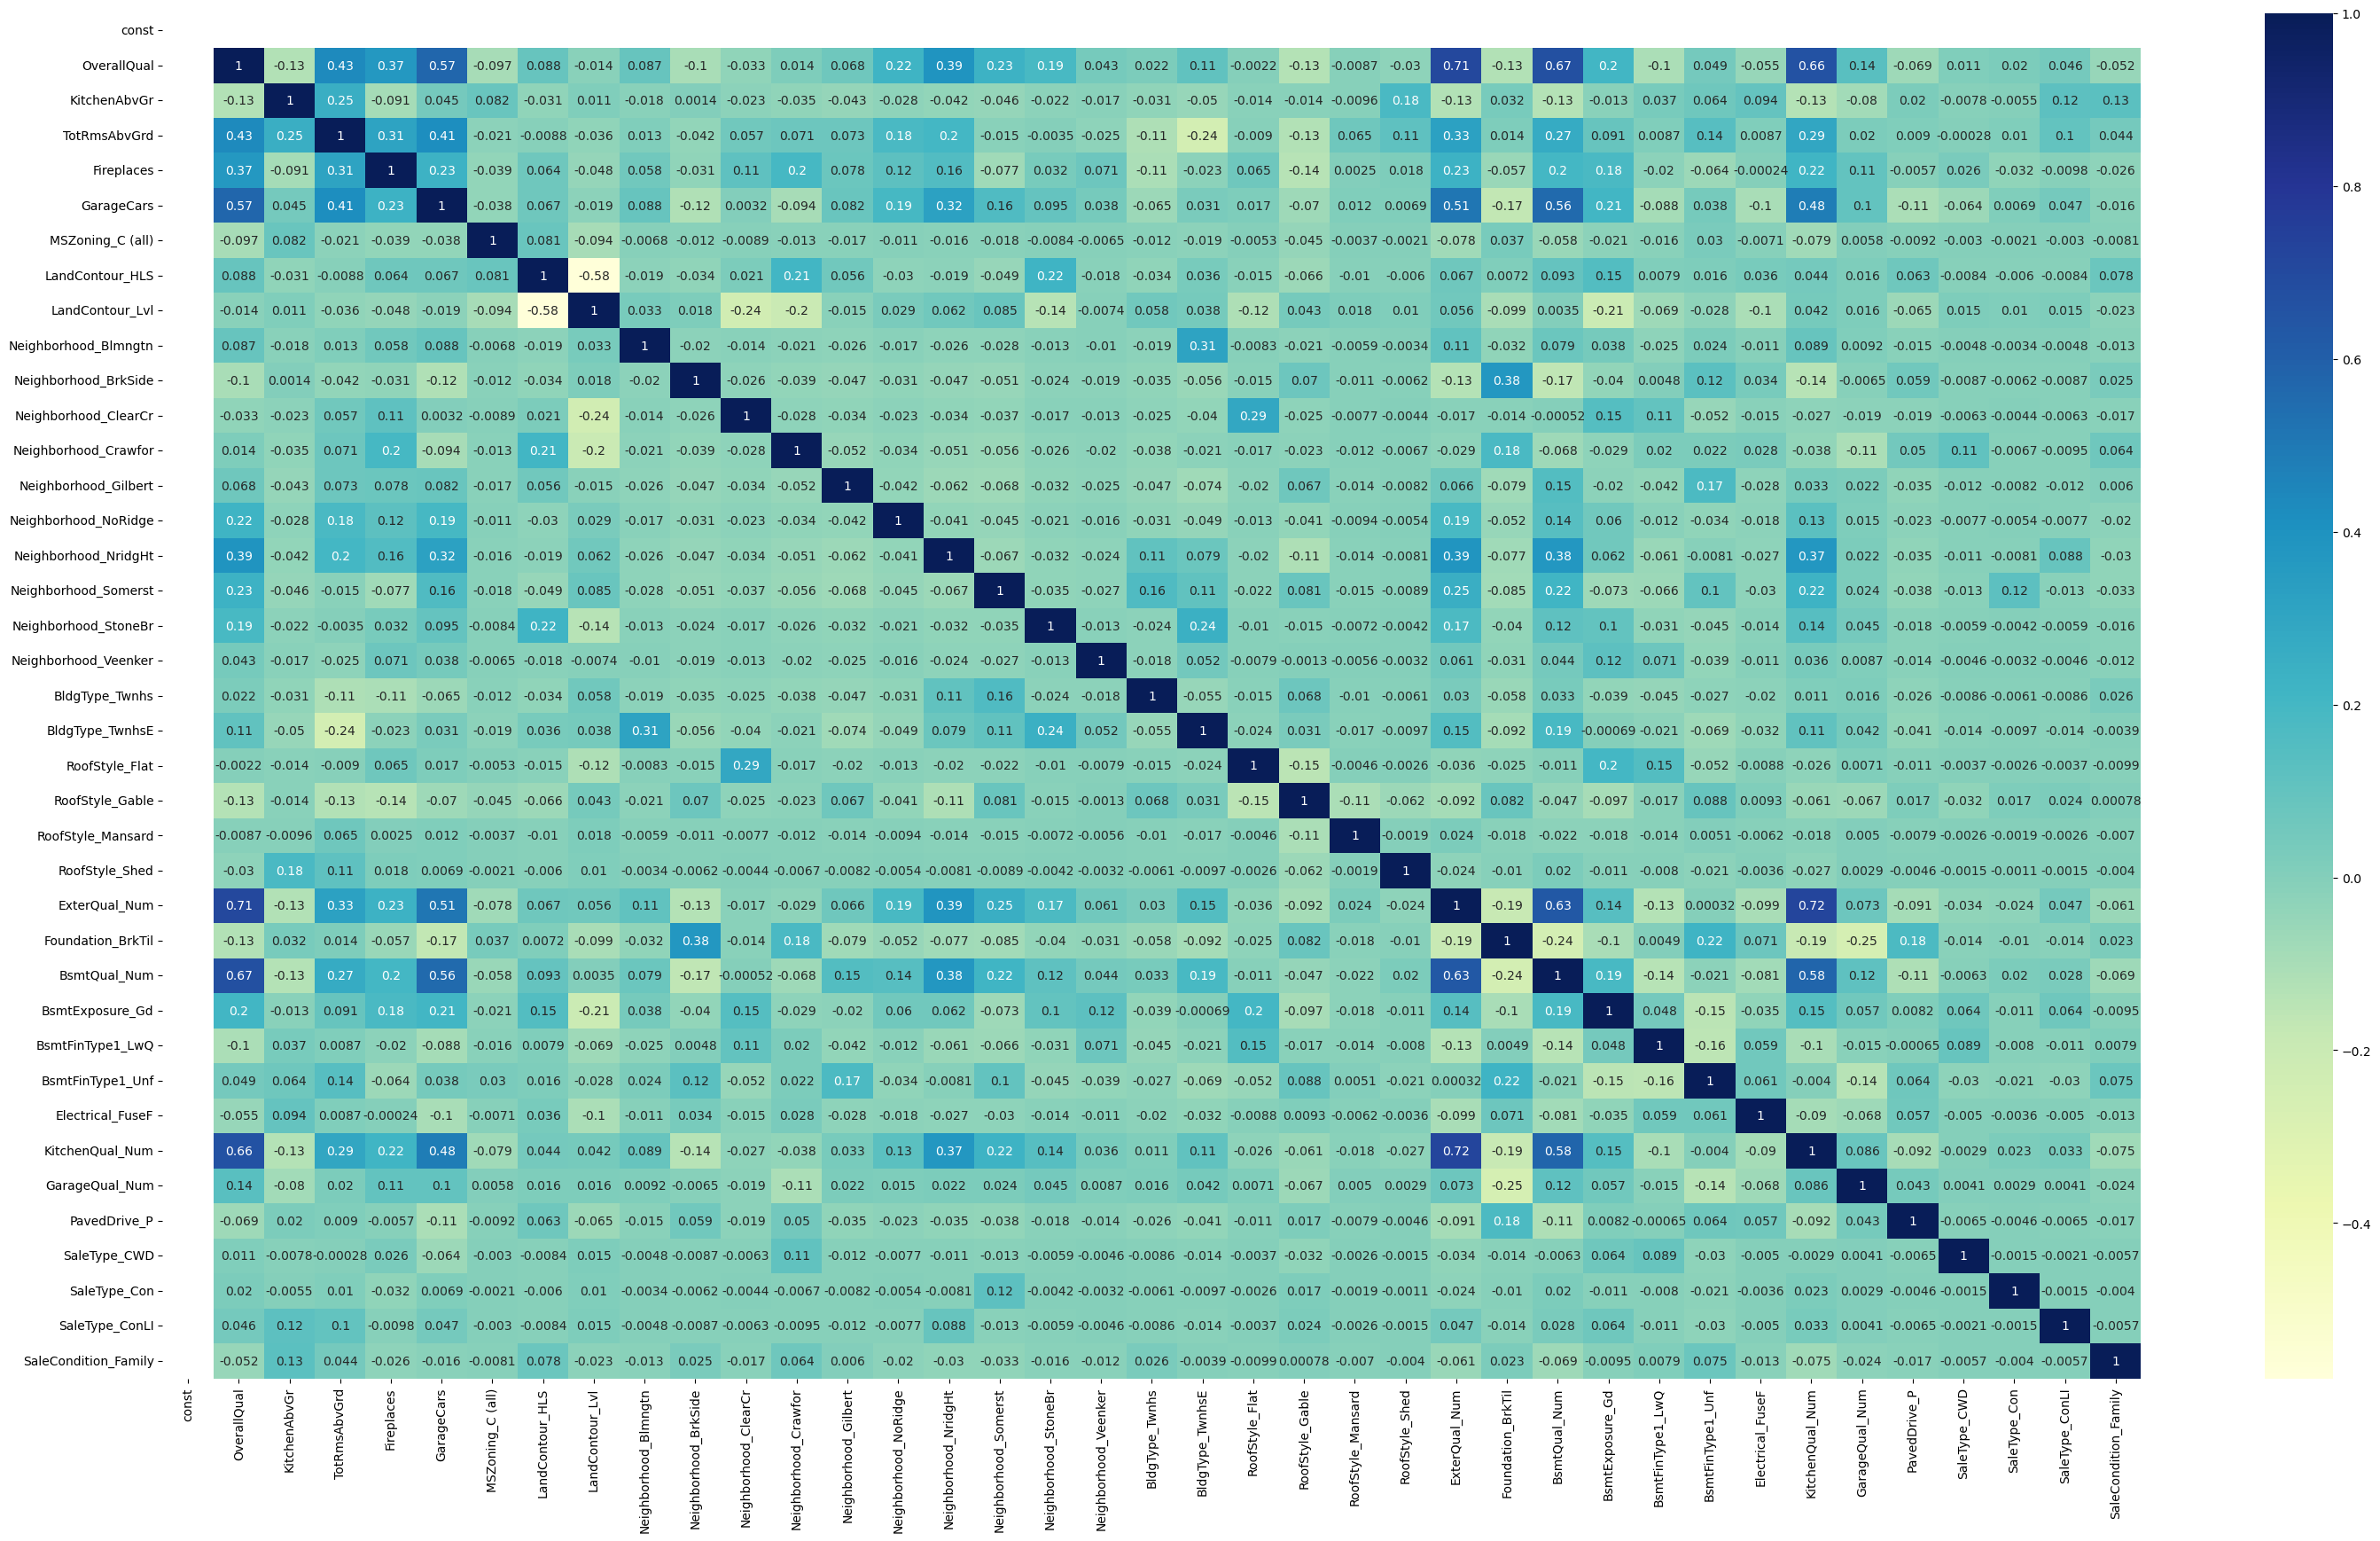

In [122]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (36, 20))
sns.heatmap(X_train_rfe1.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [123]:
#Removing highly correlated fields
X_train_rfe2 = X_train_rfe1.drop(['ExterQual_Num','BsmtQual_Num','KitchenQual_Num','GarageCars','TotRmsAbvGrd'], axis=1)
X_train_rfe2.shape

(936, 34)

## Ridge Regression

In [124]:
X_seq = np.linspace(X_train_rfe2.min(),X_train_rfe2.max(),300).reshape(-1,1) # values to be considered for predictor variable

In [125]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # Higher the value of lambda, 
                                                  # more the regularization

In [126]:
for i in lambdas: # for each lambda we get different model coefficients
    degree = 1 # Degree for polynomial regression
    # Creating degree 1 features
    ridgecoef = PolynomialFeatures(degree)
    
    X_train_rfe2_poly = ridgecoef.fit_transform(X_train_rfe2)
    ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
    ridgereg.fit(X_train_rfe2_poly, y_train) # fit the model on the polynomial features
    
    #Computing the r2 score
    y_train_pred = ridgereg.predict(ridgecoef.fit_transform(X_train_rfe2))
    print("r2 score = " + str(r2_score(y_train, y_train_pred))) 
    print(ridgereg.coef_) # model coefficients

r2 score = 0.7527099863421224
[ 2.19905339e+18  2.47054965e+18  3.16927019e+04  7.03067422e+02
  1.15528859e+04 -2.31711020e+04  1.22969289e+04  7.51390359e+03
  1.19877002e+04  2.31710407e+03  4.02346602e+04  3.25932342e+04
  4.69250501e+02  9.67459091e+04  7.66201589e+04  3.00738110e+04
  5.35795184e+04  2.48977063e+04 -5.65046943e+04 -4.28220501e+04
 -2.93142669e+04 -6.92573520e+03  1.31461452e+04  3.56778438e+04
 -1.66386723e+04  4.20967592e+04 -9.59547625e+03 -1.17218267e+04
 -2.70879378e+04  1.06774990e+04 -1.71258491e+04 -3.95216038e+04
 -1.09818562e+04  9.47119889e+03 -5.97680819e+03]
r2 score = 0.7526832003732207
[     0.              0.          31434.93897318   2633.12014202
  11567.70965261 -24752.16304669  14884.44902219   9127.4218233
  11906.65881475   2744.59193276  39780.02334287  32996.17960721
    327.47568276  95997.36580225  76702.67196253  30199.79552226
  54019.41538289  25341.47829911 -56466.51907145 -42699.10639639
 -28813.51246756  -7034.37821703  13362.355762

## Lasso Regression

In [127]:
# Applying Lasso Regression with varying the hyperparameter 'lambda'

lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in lambdas:
    degree = 1
    # Creating degree 1 features
    lassocoef = PolynomialFeatures(degree)
    
    X_train_lasso_poly = lassocoef.fit_transform(X_train_rfe2)
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_train_lasso_poly, y_train)

    # Compute R^2 
    y_train_pred_lasso = lassoreg.predict(lassocoef.fit_transform(X_train_rfe2))
    print("r2 score = " + str(r2_score(y_train, y_train_pred_lasso)))
    print(lassoreg.coef_)

r2 score = 0.7526832011984945
[     0.              0.          31434.29191488   2632.17461229
  11567.27982002 -24758.57737128  14885.06322615   9128.33333463
  11911.14370086   2745.0025608   39784.28521808  32999.04014052
    328.43347324  96003.05996495  76706.73789574  30202.56248925
  54026.1182294   25345.63645113 -56469.36130358 -42701.26705404
 -28820.02119276  -7034.34232654  13367.38000169  34941.89108577
 -16645.52136304  42100.73052195  -9738.10337978 -11115.5388355
 -27050.76879545  10895.60950713 -17200.27077923 -39991.03465233
 -11695.45847439   9561.49663242  -6506.10849509]
r2 score = 0.7526832011976804
[     0.              0.          31434.30548599   2632.1640356
  11567.28979019 -24758.33052612  14884.9952648    9128.29069563
  11910.9692658    2744.9521036   39784.16524394  32998.96239
    328.39327928  96002.98226853  76706.67163125  30202.48571184
  54025.99397019  25345.49615299 -56469.31049293 -42701.21037683
 -28819.82805846  -7034.33761228  13367.05980308  

## Linear Regression Model

In [128]:
import statsmodels.api as sm  
X_train_lm2 = sm.add_constant(X_train_rfe2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model
# see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     83.19
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          9.91e-248
Time:                        01:05:26   Log-Likelihood:                -11226.
No. Observations:                 936   AIC:                         2.252e+04
Df Residuals:                     902   BIC:                         2.269e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -6.076e+04 

In [134]:
imp_df = pd.DataFrame({
    "Varname": X_train_rfe2.columns})
imp_df

,Varname
0,const
1,OverallQual
2,KitchenAbvGr
3,Fireplaces
4,MSZoning_C (all)
5,LandContour_HLS
6,LandContour_Lvl
7,Neighborhood_Blmngtn
8,Neighborhood_BrkSide
9,Neighborhood_ClearCr


## Dividing into X_test and y_test

In [135]:
y_test = housing_data_test.pop('SalePrice')
X_test = housing_data_test

In [136]:
X_test_rfe = X_test[col]

In [137]:
X_test_rfe1 = X_test_rfe.drop(['SaleType_New','SaleType_WD','LotConfig_Inside','LotConfig_Corner',
                                'SaleCondition_Partial','LotConfig_CulDSac','SaleType_COD','LotConfig_FR2',
                                'LotShape_Reg','LotShape_IR1','SaleType_ConLD','SaleType_ConLw'], axis=1)

In [138]:
X_test_rfe2 = X_test_rfe1.drop(['ExterQual_Num','BsmtQual_Num','KitchenQual_Num','GarageCars','TotRmsAbvGrd'], axis=1)

In [139]:
# Adding constant variable to test dataframe
X_test_rfe2 = sm.add_constant(X_test_rfe2)

In [141]:
y_test_pred_lm = lm2.predict(X_test_rfe2)

In [142]:
# test data: r-square using linear model
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred_lm)

0.7518049112493337